## IMPORTING LIBRARIES

In [119]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

## MazeNode class


In [120]:
class MazeNode:
    """A class to represent a square in the grid for A* Pathfinding."""
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position  # Stored as a tuple (row, col)

        self.g = 0  # Cost from start to current node
        self.h = 0  # Heuristic (estimated cost from current node to end)
        self.f = 0  # Total cost (g + h)

    def __eq__(self, other):
        """Compares two nodes based on their position."""
        return self.position == other.position

    def __lt__(self, other):
        """Defines the less-than comparison for the priority queue (sorts by f-score)."""
        return self.f < other.f


## The A* Algorithm Implementation

In [121]:
def astar_maze_search(maze, start_pos, end_pos, heuristic_func):
    
    # Create start and end node objects
    start_node = MazeNode(None, start_pos)
    end_node = MazeNode(None, end_pos)

    # Initialize the open_frontier (as a priority queue) and the explored_nodes set
    open_frontier = []
    heapq.heappush(open_frontier, start_node)
    explored_nodes = set()

    # Main loop - continues as long as there are nodes to check
    while open_frontier:

        # Get the node with the lowest f-score from the priority queue
        current_node = heapq.heappop(open_frontier)
        explored_nodes.add(current_node.position)

        # --- Goal Check ---
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1]  # Return path in correct order

        # --- Neighbor Exploration ---
        possible_moves = [(0, -1), (0, 1), (-1, 0), (1, 0)]
        
        for move in possible_moves:
            neighbor_pos = (current_node.position[0] + move[0], current_node.position[1] + move[1])

            # 1. Check if within maze boundaries
            if not (0 <= neighbor_pos[0] < len(maze) and 0 <= neighbor_pos[1] < len(maze[0])):
                continue

            # 2. Check if the neighbor is a wall
            if maze[neighbor_pos[0]][neighbor_pos[1]] == 1:
                continue
            
            # 3. Check if neighbor has already been explored
            if neighbor_pos in explored_nodes:
                continue

            # Create neighbor node
            neighbor_node = MazeNode(current_node, neighbor_pos)

            # Calculate g, h, f
            neighbor_node.g = current_node.g + 1
            neighbor_node.h = heuristic_func(neighbor_node.position, end_node.position)
            neighbor_node.f = neighbor_node.g + neighbor_node.h

            # 4. Skip if better path already in open_frontier
            if any(open_node for open_node in open_frontier if neighbor_node == open_node and neighbor_node.g >= open_node.g):
                continue

            # Add neighbor to open_frontier
            heapq.heappush(open_frontier, neighbor_node)
            
    return None  # No path found


## Defining Heuristic Functions

In [122]:
# Heuristic 1: The Golden Standard (Admissible & Consistent)
def manhattan_maze_heuristic(current_pos, end_pos):
    """Calculates the Manhattan distance between two points."""
    return abs(current_pos[0] - end_pos[0]) + abs(current_pos[1] - end_pos[1])

# Heuristic 2: The Pessimist (Non-Admissible)
def non_admissible_maze_heuristic(current_pos, end_pos):
    """An example of a non-admissible heuristic that overestimates the cost."""
    return manhattan_maze_heuristic(current_pos, end_pos) * 1.5  # May overestimate

# Heuristic 3: The Unreliable Guide (Inconsistent)
def inconsistent_maze_heuristic(pos, goal):
    # Inconsistent heuristic: overestimates moving from (4,4) to (4,5)
    if pos == (4,4):
        return 10   # deliberately higher than 1 + heuristic(4,5)
    return abs(pos[0]-goal[0]) + abs(pos[1]-goal[1])

## Maze and Visualization 

In [123]:
# maze. 0 = path, 1 = wall
maze = [
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 1, 1, 0],  # Trap zone for inconsistent heuristic
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
]

start_position = (0, 0)
end_position = (9, 9)
OPTIMAL_COST = 18 

def visualize_path(maze, path, title):
    """Visualizes the maze and the path found by the algorithm."""
    vis_maze = [row[:] for row in maze]
    
    if path:
        # Mark the path cells with a different value (e.g., 2)
        for step in path:
            if vis_maze[step[0]][step[1]] == 0:
                vis_maze[step[0]][step[1]] = 2
        # Mark start and end with special values (e.g., 3 and 4)
        vis_maze[path[0][0]][path[0][1]] = 3 # Start
        vis_maze[path[-1][0]][path[-1][1]] = 4 # End
    
    plt.figure(figsize=(8, 8))
    # Use a color map to distinguish path, walls, start, and end
    plt.imshow(vis_maze, cmap='hot')
    plt.title(title, fontsize=16)
    plt.xticks([]), plt.yticks([]) # Hide axis ticks
    plt.show()


#### Experiment 1: Standard A* with Manhattan Heuristic (The Baseline)

This is our control case. Since the Manhattan heuristic is both admissible and consistent, we expect A* to find the true shortest path.

--- Experiment 1: Standard A* (Admissible & Consistent) ---
Path found with cost: 18
Is the path optimal? True


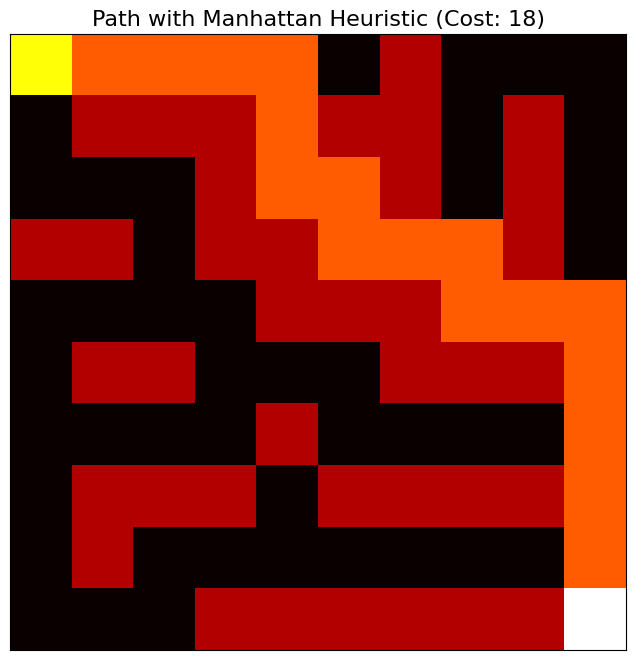

In [124]:
print("--- Experiment 1: Standard A* (Admissible & Consistent) ---")

path1 = astar_maze_search(maze, start_position, end_position, manhattan_maze_heuristic)

if path1:
    cost1 = len(path1) - 1
    print(f"Path found with cost: {cost1}")
    print(f"Is the path optimal? {cost1 == OPTIMAL_COST}")
    visualize_path(maze, path1, f"Path with Manhattan Heuristic (Cost: {cost1})")
else:
    print("No path found.")


#### Experiment 2: A* with a Non-Admissible Heuristic

Here, we use our pessimistic heuristic that overestimates the cost. Let's see if it gets tricked into finding a longer path.


--- Experiment 2: A* with Non-Admissible Heuristic ---
Path found with cost: 18
Is the path optimal? True


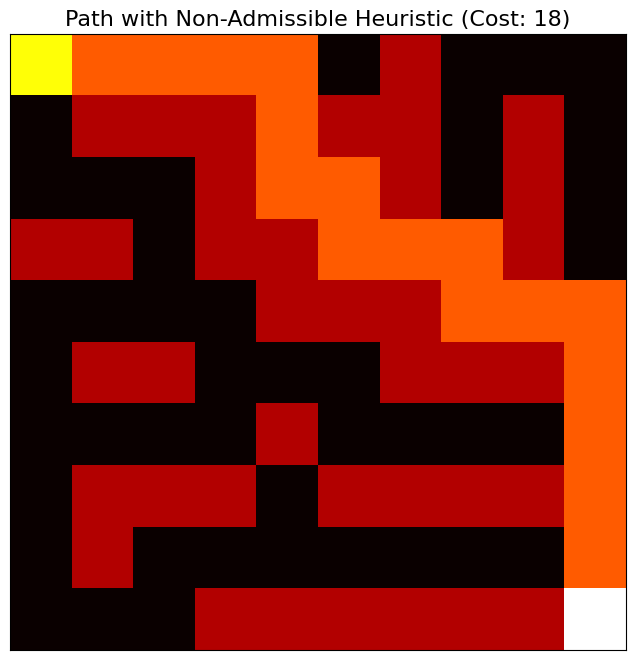

In [125]:
print("\n--- Experiment 2: A* with Non-Admissible Heuristic ---")

path2 = astar_maze_search(maze, start_position, end_position, non_admissible_maze_heuristic)

if path2:
    cost2 = len(path2) - 1
    print(f"Path found with cost: {cost2}")
    print(f"Is the path optimal? {cost2 == OPTIMAL_COST}")
    visualize_path(maze, path2, f"Path with Non-Admissible Heuristic (Cost: {cost2})")
else:
    print("No path found.")


#### Experiment 3: A* with an Inconsistent Heuristic

Finally, we use the heuristic with the misleading "trap" cell. This heuristic is unreliable and might confuse the algorithm.


--- Experiment 3: A* with Inconsistent Heuristic ---
Path found with cost: 18
Is the path optimal? True


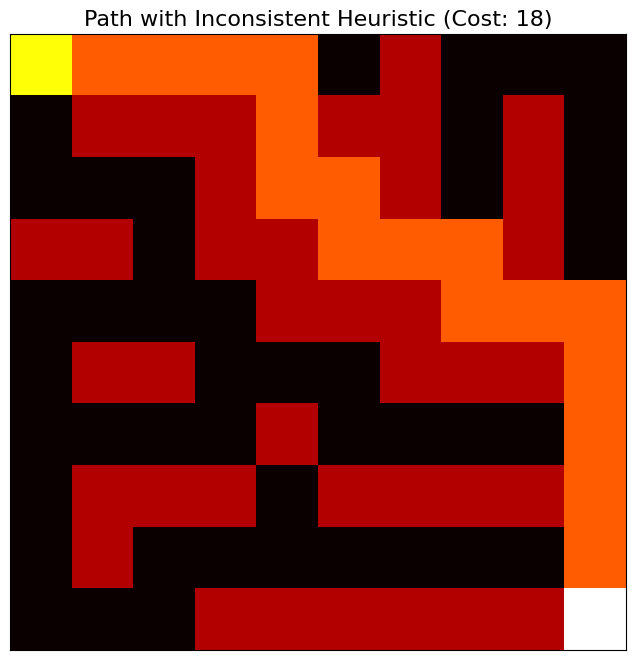

In [126]:
print("\n--- Experiment 3: A* with Inconsistent Heuristic ---")

path3 = astar_maze_search(maze, start_position, end_position, inconsistent_maze_heuristic)

if path3:
    cost3 = len(path3) - 1
    print(f"Path found with cost: {cost3}")
    print(f"Is the path optimal? {cost3 == OPTIMAL_COST}")
    visualize_path(maze, path3, f"Path with Inconsistent Heuristic (Cost: {cost3})")
else:
    print("No path found.")
